# Ensemble Techniques | Project

In [138]:
import numpy as np
import pandas as pd
import io
%matplotlib inline
import seaborn as sns;
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [139]:
# from google.colab import files
# uploaded = files.upload()

In [140]:
# df = pd.read_csv(io.BytesIO(uploaded['parkinsons.data']))
df = pd.read_csv("parkinsons.data")
df.shape

(195, 24)

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
name                195 non-null object
MDVP:Fo(Hz)         195 non-null float64
MDVP:Fhi(Hz)        195 non-null float64
MDVP:Flo(Hz)        195 non-null float64
MDVP:Jitter(%)      195 non-null float64
MDVP:Jitter(Abs)    195 non-null float64
MDVP:RAP            195 non-null float64
MDVP:PPQ            195 non-null float64
Jitter:DDP          195 non-null float64
MDVP:Shimmer        195 non-null float64
MDVP:Shimmer(dB)    195 non-null float64
Shimmer:APQ3        195 non-null float64
Shimmer:APQ5        195 non-null float64
MDVP:APQ            195 non-null float64
Shimmer:DDA         195 non-null float64
NHR                 195 non-null float64
HNR                 195 non-null float64
status              195 non-null int64
RPDE                195 non-null float64
DFA                 195 non-null float64
spread1             195 non-null float64
spread2             195 non-null floa

<b>No evident missing values</b>

In [142]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MDVP:Fo(Hz),195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000
MDVP:Fhi(Hz),195.0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000
MDVP:Flo(Hz),195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000
MDVP:Jitter(%),195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160
MDVP:Jitter(Abs),195.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260
MDVP:RAP,195.0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440
MDVP:PPQ,195.0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580
Jitter:DDP,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330
MDVP:Shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080
MDVP:Shimmer(dB),195.0,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000


In [143]:
df["status"].value_counts()

1    147
0     48
Name: status, dtype: int64

<b>Uni-Variant analysis</b>

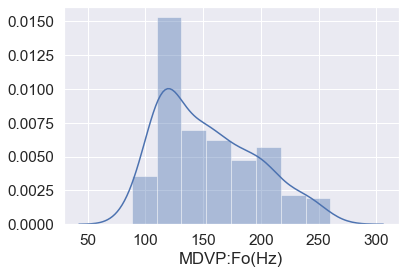

In [144]:
sns.distplot(df['MDVP:Fo(Hz)'])

Right skew observed in MDVP:Fo(Hz)

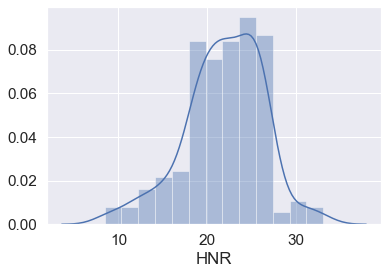

In [145]:
sns.distplot(df['HNR'])

Left skew observed in 'HNR'

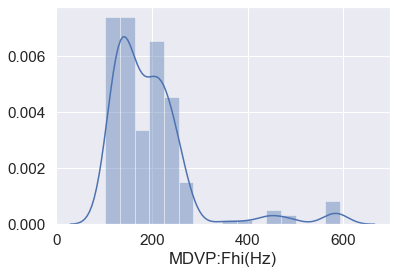

In [146]:
sns.distplot(df['MDVP:Fhi(Hz)'])

Right skew observed in MDVP:Fhi(Hz)

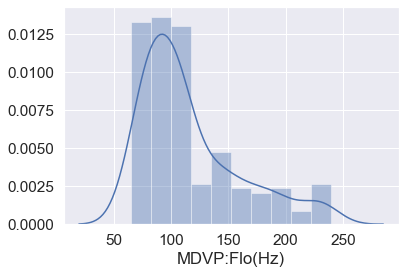

In [147]:
sns.distplot(df['MDVP:Flo(Hz)'])

Right skew observed in MDVP:Flo(Hz)

<b>Bi-Variant Analysis</b>

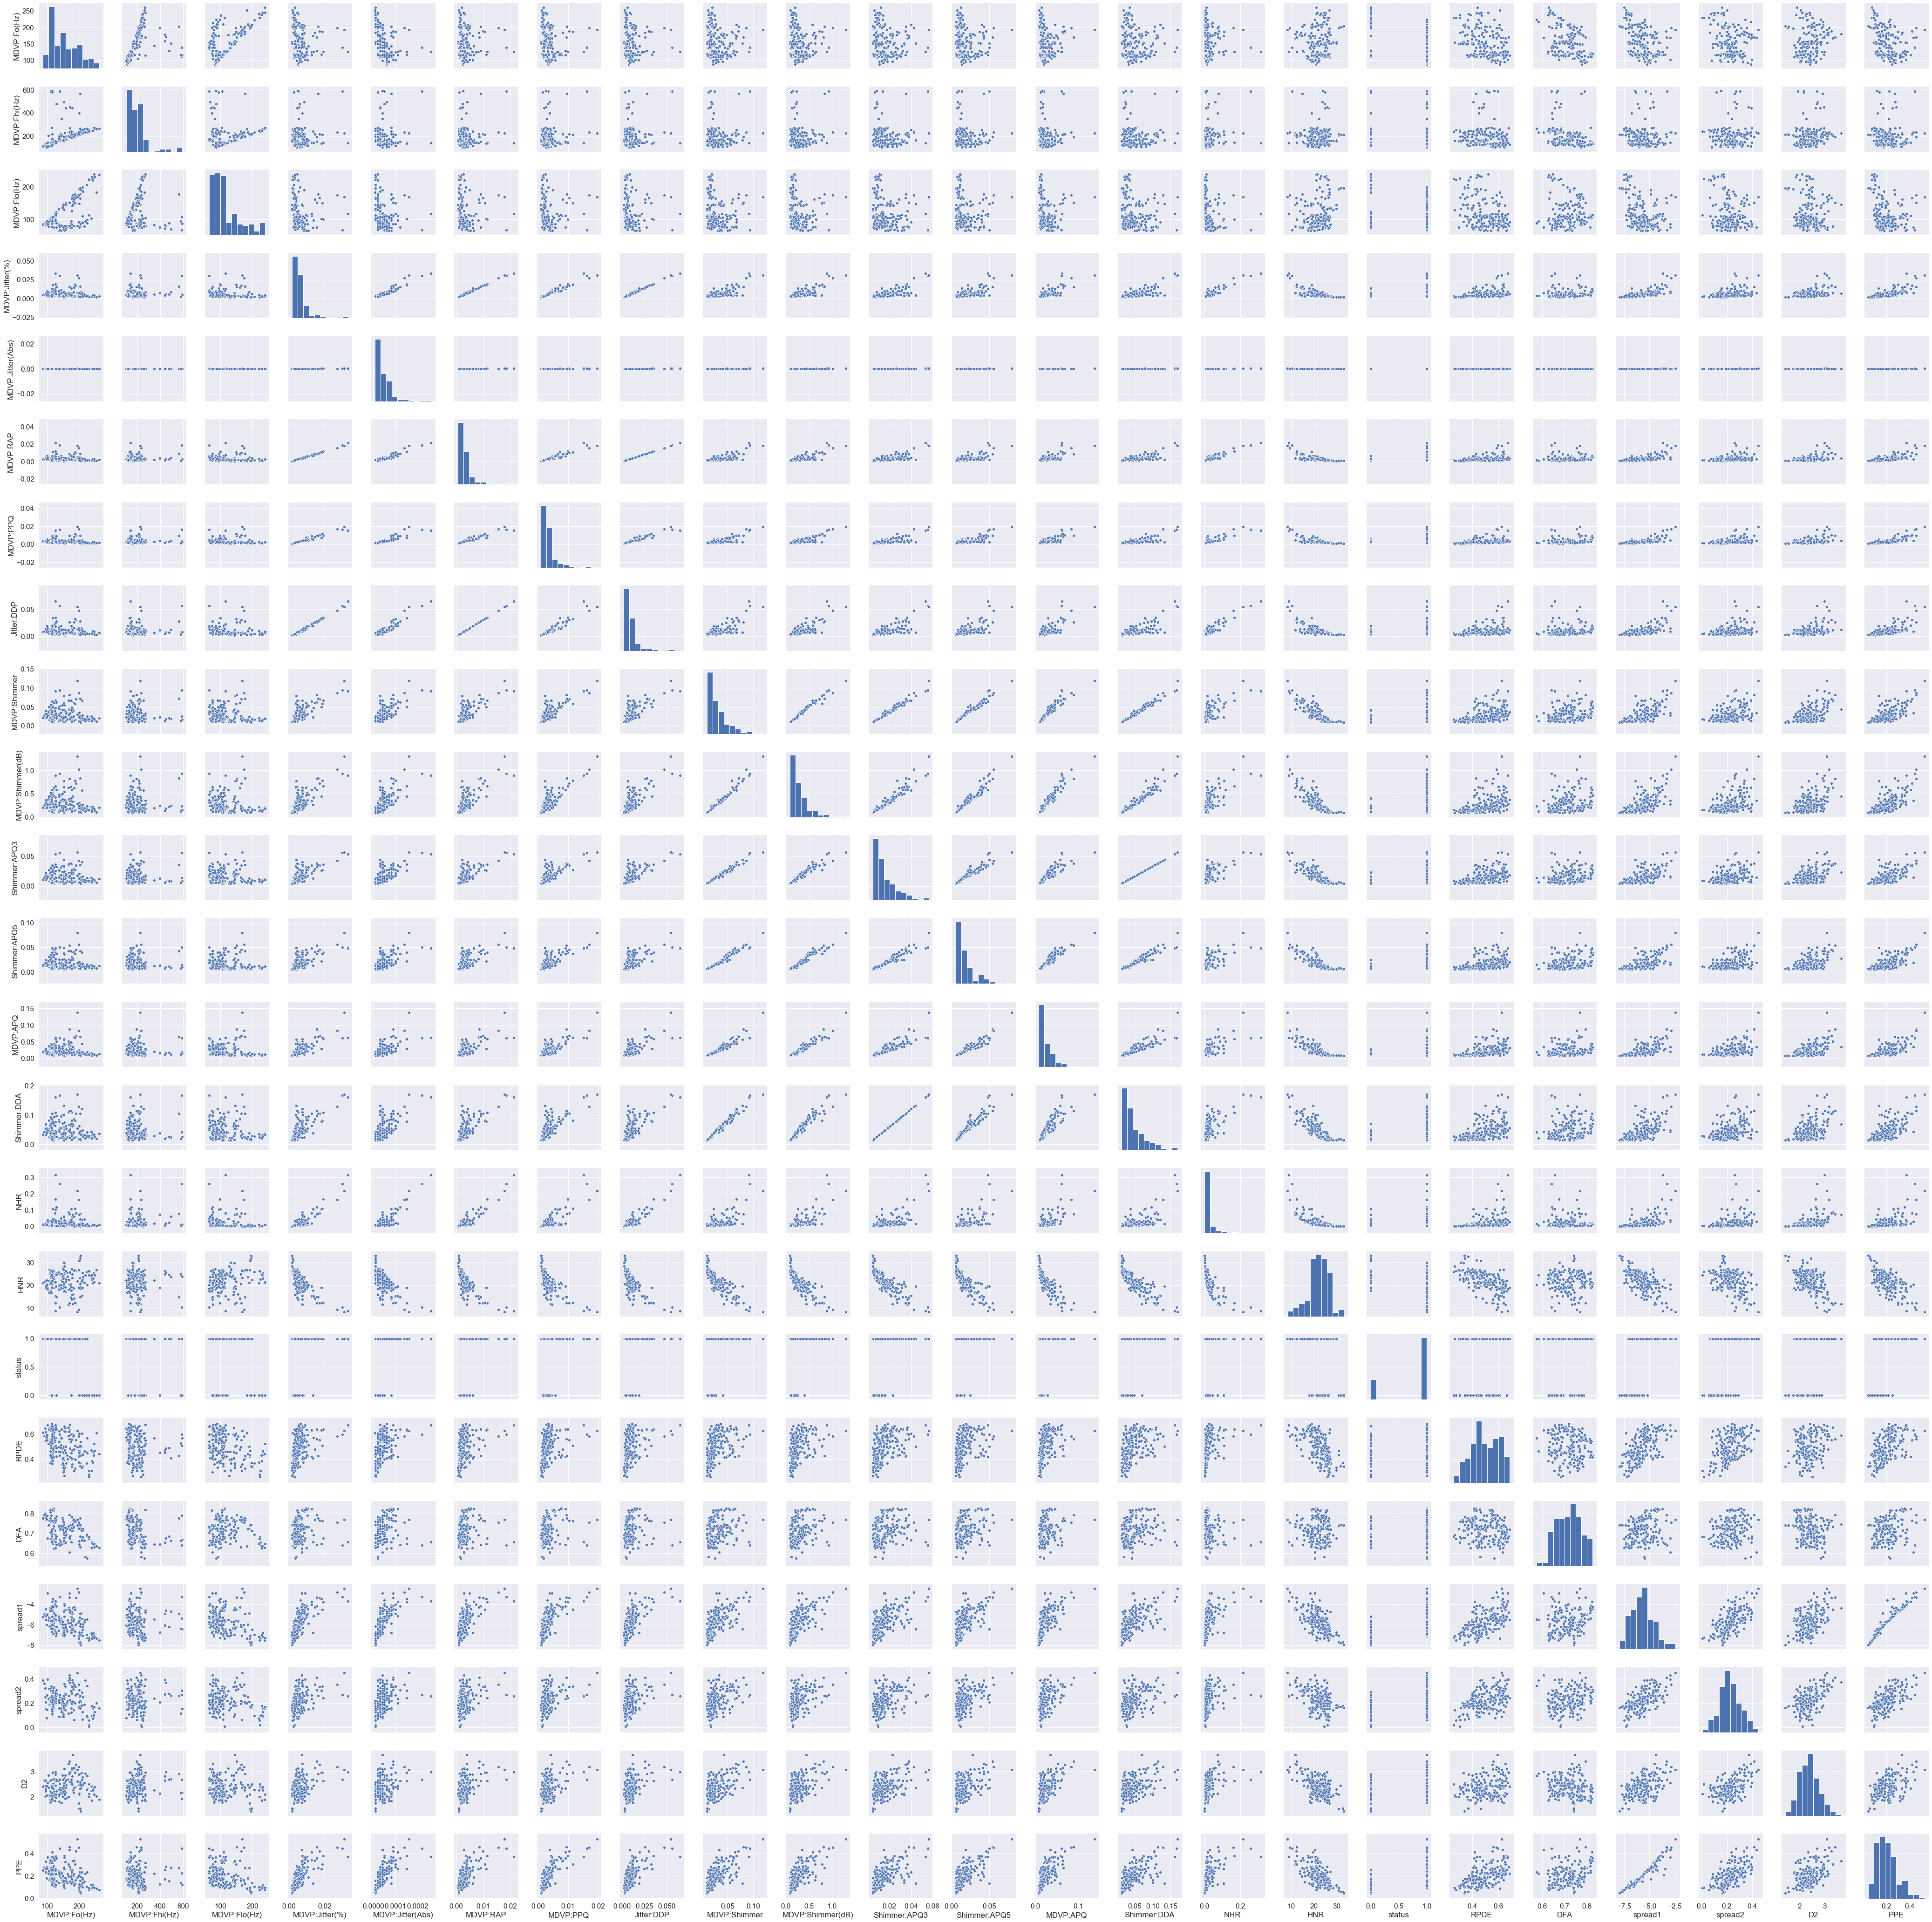

In [148]:
sns.pairplot(df)

<b>The pairplot shows the correlation across all the features.</b>

In [149]:
# sns.heatmap(df.corr(), annot=True) 

In [150]:
df.corr()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
MDVP:Fo(Hz),1.000000,0.400985,0.596546,-0.118003,-0.382027,-0.076194,-0.112165,-0.076213,-0.098374,-0.073742,...,-0.094732,-0.021981,0.059144,-0.383535,-0.383894,-0.446013,-0.413738,-0.249450,0.177980,-0.372356
MDVP:Fhi(Hz),0.400985,1.000000,0.084951,0.102086,-0.029198,0.097177,0.091126,0.097150,0.002281,0.043465,...,-0.003733,0.163766,-0.024893,-0.166136,-0.112404,-0.343097,-0.076658,-0.002954,0.176323,-0.069543
MDVP:Flo(Hz),0.596546,0.084951,1.000000,-0.139919,-0.277815,-0.100519,-0.095828,-0.100488,-0.144543,-0.119089,...,-0.150737,-0.108670,0.210851,-0.380200,-0.400143,-0.050406,-0.394857,-0.243829,-0.100629,-0.340071
MDVP:Jitter(%),-0.118003,0.102086,-0.139919,1.000000,0.935714,0.990276,0.974256,0.990276,0.769063,0.804289,...,0.746635,0.906959,-0.728165,0.278220,0.360673,0.098572,0.693577,0.385123,0.433434,0.721543
MDVP:Jitter(Abs),-0.382027,-0.029198,-0.277815,0.935714,1.000000,0.922911,0.897778,0.922913,0.703322,0.716601,...,0.697170,0.834972,-0.656810,0.338653,0.441839,0.175036,0.735779,0.388543,0.310694,0.748162
MDVP:RAP,-0.076194,0.097177,-0.100519,0.990276,0.922911,1.000000,0.957317,1.000000,0.759581,0.790652,...,0.744919,0.919521,-0.721543,0.266668,0.342140,0.064083,0.648328,0.324407,0.426605,0.670999
MDVP:PPQ,-0.112165,0.091126,-0.095828,0.974256,0.897778,0.957317,1.000000,0.957319,0.797826,0.839239,...,0.763592,0.844604,-0.731510,0.288698,0.333274,0.196301,0.716489,0.407605,0.412524,0.769647
Jitter:DDP,-0.076213,0.097150,-0.100488,0.990276,0.922913,1.000000,0.957319,1.000000,0.759555,0.790621,...,0.744901,0.919548,-0.721494,0.266646,0.342079,0.064026,0.648328,0.324377,0.426556,0.671005
MDVP:Shimmer,-0.098374,0.002281,-0.144543,0.769063,0.703322,0.759581,0.797826,0.759555,1.000000,0.987258,...,0.987626,0.722194,-0.835271,0.367430,0.447424,0.159954,0.654734,0.452025,0.507088,0.693771
MDVP:Shimmer(dB),-0.073742,0.043465,-0.119089,0.804289,0.716601,0.790652,0.839239,0.790621,0.987258,1.000000,...,0.963202,0.744477,-0.827805,0.350697,0.410684,0.165157,0.652547,0.454314,0.512233,0.695058


Strong correlation observed between 'MDVP:RAP' and 'MDVP:Jitter(%)'<br>
Strong correlation observed between 'MDVP:Jitter(Abs)' and 'MDVP:Jitter(%)'<br>
Strong correlation observed between 'Jitter:DDP' and 'MDVP:Jitter(%)'<br>
Strong correlation observed between 'MDVP:PPQ' and 'MDVP:Jitter(%)'<br>
<br>
Weak correlation observed between 'MDVP:Shimmer' and 'MDVP:Fhi(Hz)'<br>
Weak correlation observed between 'MDVP:APQ' and 'MDVP:Fhi(Hz)'<br>
Weak correlation observed between 'spread2' and 'MDVP:Fhi(Hz)'<br>

<b>Split the data set into training and test set in the ratio of 70:30 (Training:Test)</b>

In [151]:
# splitting data into training and test set for independent attributes
df = df.drop("name", axis=1)
from sklearn.model_selection import train_test_split

X =  df.drop("status", axis=1)
y =  df.pop("status")

train_set, test_set, train_labels, test_labels = train_test_split(X, y, test_size=0.30, random_state=1)

In [152]:
train_set.shape

(136, 22)

In [153]:
test_set.shape

(59, 22)

In [154]:
train_labels.shape

(136,)

In [155]:
test_labels.shape

(59,)

<b>Create the model using “entropy” method of reducing the entropy and fit it to training data.</b>

In [156]:
from sklearn.tree import DecisionTreeClassifier

In [157]:
dt_model = DecisionTreeClassifier(criterion = 'entropy')

In [158]:
dt_model.fit(train_set, train_labels)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [159]:
dt_model.fit(train_set, train_labels)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [160]:
print('Accuracy score: {}'.format(dt_model.score(test_set , test_labels)))

Accuracy score: 0.847457627118644


In [161]:
print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = train_set.columns))

                       Imp
MDVP:Fo(Hz)       0.219150
MDVP:Fhi(Hz)      0.099800
MDVP:Flo(Hz)      0.000000
MDVP:Jitter(%)    0.000000
MDVP:Jitter(Abs)  0.000000
MDVP:RAP          0.000000
MDVP:PPQ          0.000000
Jitter:DDP        0.000000
MDVP:Shimmer      0.000000
MDVP:Shimmer(dB)  0.000000
Shimmer:APQ3      0.106000
Shimmer:APQ5      0.000000
MDVP:APQ          0.000000
Shimmer:DDA       0.000000
NHR               0.000000
HNR               0.000000
RPDE              0.000000
DFA               0.067644
spread1           0.000000
spread2           0.040734
D2                0.079409
PPE               0.387263


<b>Use regularization parameters of max_depth, min_sample_leaf to recreate the model. What is the impact on the model accuracy? How does regularization help?</b>

In [162]:
dt_model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3, min_samples_leaf=1)
dt_model.fit(train_set, train_labels)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [163]:
test_pred = dt_model.predict(test_set)

In [164]:
print('Accuracy score after Regularization: {}'.format(dt_model.score(test_set , test_labels)))

Accuracy score after Regularization: 0.9152542372881356


In [165]:
print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = train_set.columns))

                       Imp
MDVP:Fo(Hz)       0.245788
MDVP:Fhi(Hz)      0.111931
MDVP:Flo(Hz)      0.000000
MDVP:Jitter(%)    0.000000
MDVP:Jitter(Abs)  0.000000
MDVP:RAP          0.000000
MDVP:PPQ          0.000000
Jitter:DDP        0.000000
MDVP:Shimmer      0.000000
MDVP:Shimmer(dB)  0.000000
Shimmer:APQ3      0.000000
Shimmer:APQ5      0.000000
MDVP:APQ          0.000000
Shimmer:DDA       0.118884
NHR               0.000000
HNR               0.000000
RPDE              0.000000
DFA               0.089061
spread1           0.000000
spread2           0.000000
D2                0.000000
PPE               0.434335


Regularization parameters helped improve the accuracy of the model from 86.4% to 89.8%

<b>Implement the decision tree using Random Forest.</b>

In [166]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50)
rfcl = rfcl.fit(train_set, train_labels)

In [167]:
test_pred = rfcl.predict(test_set)
print('Accuracy score for RandomForest: {}'.format(rfcl.score(test_set , test_labels)))

Accuracy score for RandomForest: 0.8305084745762712


In [186]:
n_estimators = [5,10,50,99,100,101,110,200,500]

In [188]:
for n_estimator in n_estimators:
    rfcl = RandomForestClassifier(n_estimators = n_estimator)
    rfcl = rfcl.fit(train_set, train_labels)
    test_pred = rfcl.predict(test_set)
    res = rfcl.score(test_set , test_labels)    
    print('Accuracy score for RandomForest with n-estimator: {} is {}'.format(n_estimator, res))

Accuracy score for RandomForest with n-estimator: 5 is 0.8305084745762712
Accuracy score for RandomForest with n-estimator: 10 is 0.8813559322033898
Accuracy score for RandomForest with n-estimator: 50 is 0.847457627118644
Accuracy score for RandomForest with n-estimator: 99 is 0.847457627118644
Accuracy score for RandomForest with n-estimator: 100 is 0.847457627118644
Accuracy score for RandomForest with n-estimator: 101 is 0.8305084745762712
Accuracy score for RandomForest with n-estimator: 110 is 0.864406779661017
Accuracy score for RandomForest with n-estimator: 200 is 0.8305084745762712
Accuracy score for RandomForest with n-estimator: 500 is 0.847457627118644


<b>The optimal number of trees that gives the best result is as seen above.<b/>